# Prova 1 

**Aluno**: Antonio Paulo Steffen Neto

**GRR**: GRR20240436

**Link para o Vídeo**: [Vídeo - Prova 1 - Antonio Steffen](https://drive.google.com/file/d/1JgtWSeBfuQ3qcuCY_EcOl4Zp6MfCVmYi/view?usp=sharing)

## Exercício 1

Você recebeu três tabelas de um pequeno sistema de vendas: **vendas**, **vendedores** e **produtos**, em formato csv.

Sua tarefa é escrever um código que importe os dados dessas tabelas para o Python, una as informações e gere uma visão consolidada das vendas, utilizando a biblioteca pandas. Após gerar essa visão, responda às questões:

- Quem é o melhor e o pior vendedor?
- Qual o produto que mais vende e o que menos vende?
- Qual é a média mensal de vendas (R$) dessa empresa? E o desvio padrão?
- Qual foi o mês que mais vendeu? Qual o total vendido até agora?
- Que outras análises podemos extrair desses dados?


In [1]:
import pandas as pd

## Importação do conjunto de dados

vendas = pd.read_csv("C:/Users/anton/OneDrive/Área de Trabalho/CE062---Introdu-o-ao-Python/Prova 1/vendas.csv", sep='[;,\\s]+', header = None)
vendedores = pd.read_csv("C:/Users/anton/OneDrive/Área de Trabalho/CE062---Introdu-o-ao-Python/Prova 1/vendedores.csv", sep='[;,\\s]+', header = None)
produtos = pd.read_csv("C:/Users/anton/OneDrive/Área de Trabalho/CE062---Introdu-o-ao-Python/Prova 1/produtos.csv", sep='[;,\\s]+', header = None)

## checando

display('vendas.head()', 'vendedores.head()', 'produtos.head()')

vendas.head()
vendedores.head()
produtos.head()

## removendo a coluna à direita

vendas = vendas.iloc[:, :-1]

## nomeando as colunas

vendas.columns = ['cod_vendedor', 'cod_produto', 'data', 'valor_vendido']
vendedores.columns = ['cod_vendedor', 'nome_vendedor']
produtos.columns = ['cod_produto', 'nome_produto']

## Unindo as informações

vendas_vendedores = pd.merge(vendas, vendedores, how = 'left', left_on = 'cod_vendedor', right_on = 'cod_vendedor')
vendas_vendedores.head()

vendas_completo = pd.merge(vendas_vendedores, produtos, how = 'left', left_on = 'cod_produto', right_on = 'cod_produto')
vendas_completo.head()

## Arrumando as datas

vendas_completo['data'] = pd.to_datetime(vendas_completo['data'], format='%d-%m-%Y', errors='coerce')

## Garantindo que valor vendido seja numérico

vendas_completo['valor_vendido'] = pd.to_numeric(vendas_completo['valor_vendido'], errors='coerce')

## Criando uma coluna Mes

vendas_completo['mes'] = vendas_completo['data'].dt.to_period('M')


<positron-console-cell-1>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
<positron-console-cell-1>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
<positron-console-cell-1>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


'vendas.head()'

'vendedores.head()'

'produtos.head()'

### Questão A

- Quem é o melhor e o pior vendedor?


In [2]:
## a) melhor e pior vendedor

vendas_por_vendedor = vendas_completo.groupby('nome_vendedor')['valor_vendido'].sum()

melhor_vendedor = vendas_por_vendedor.idxmax()
valor_melhor = vendas_por_vendedor.max()

pior_vendedor = vendas_por_vendedor.idxmin()
valor_pior = vendas_por_vendedor.min()

print("Questão A")
print(f"\nA melhor vendedor é a {melhor_vendedor}, ela vendeu R${valor_melhor}.")
print(f"\nO pior vendedor é o {pior_vendedor}, ele vendeu R${valor_pior}.")

Questão A

A melhor vendedor é a Denise, ela vendeu R$436.

O pior vendedor é o Bruno, ele vendeu R$306.


### Questão B

- Qual o produto que mais vende e o que menos vende?

In [3]:
## b) produtos que vendem mais e menos

# Agrupando e contando o número de transações por produto
contagem_por_produto = vendas_completo.groupby('nome_produto')['valor_vendido'].sum()

# Encontrando o Máximo (Mais Vendido) e o Mínimo (Menos Vendido)
mais_vendido = contagem_por_produto.idxmax()
qtd_mais_vendido = contagem_por_produto.max()

menos_vendido = contagem_por_produto.idxmin()
qtd_menos_vendido = contagem_por_produto.min()

print("Questão B")
print(f"\nO produto que mais vende é a {mais_vendido}, o valor vendido foi R${qtd_mais_vendido}.")
print(f"\nO produto que menos vende é a {menos_vendido}, o valor vendido foi R${qtd_menos_vendido}.")

Questão B

O produto que mais vende é a Caneta, o valor vendido foi R$623.

O produto que menos vende é a Pasta, o valor vendido foi R$120.


### Qustão C

- Qual é a média mensal de vendas (R$) dessa empresa? E o desvio padrão?

In [4]:
## c) média mensal e desvio padrão

## Agrupando as vendas por mês
vendas_por_mes = vendas_completo.groupby('mes')['valor_vendido'].sum()

## Média Mensal de Vendas da Empresa
media_mensal = round(vendas_por_mes.mean(), 2)

## Desvio Padrão Mensal
desvio_padrao_mensal = round(vendas_por_mes.std(), 2)


print("Questão C")
print(f"\nA média mensal de vendas da empresa é R${media_mensal}.")
print(f"\nO desvião padrão das vendas por mês é {desvio_padrao_mensal}.")

Questão C

A média mensal de vendas da empresa é R$490.33.

O desvião padrão das vendas por mês é 159.18.


### Questão D

- Qual foi o mês que mais vendeu? Qual o total vendido até agora?

In [5]:
## d) mês de maior venda e total vendido

## Agrupando as vendas por mês
vendas_por_mes = vendas_completo.groupby('mes')['valor_vendido'].sum()

## Mês em que mais se vendeu e total vendido

mes_de_pico = vendas_por_mes.idxmax()

print("Questão D")
print(f"\nO mês em que mais houve vendas foi {mes_de_pico}.")

## Total vendido
total_vendido = vendas_completo['valor_vendido'].sum()

print(f"\nO total vendido pela empresa até o momento foi de R${total_vendido}.")

Questão D

O mês em que mais houve vendas foi 2025-01.

O total vendido pela empresa até o momento foi de R$1471.


### Questão E - adicionais

- Que outras análises podemos extrair desses dados?

In [6]:
## e) análises adicionais

## Análises adicionais

### Valor médio dos produtos

print("Questão E")
valor_medio = vendas_completo.groupby('nome_produto')['valor_vendido'].mean().sort_values(ascending=False)

print(f"\nO valor médio de vendas por produto foi de \n{valor_medio.to_string(index=True, header=False)}.")

### Produtos de vendas mais recorrentes

vendas_totais_produto = vendas_completo.groupby('nome_produto')['valor_vendido'].size().sort_values(ascending=False)

print(f"\nO valor total de vendas por produto foi de \n{vendas_totais_produto.to_string(index=True, header=False)}.")

Questão E

O valor médio de vendas por produto foi de 
Borracha    158.500000
Caneta      155.750000
Pasta       120.000000
Caderno     115.000000
Cola         60.333333.

O valor total de vendas por produto foi de 
Caneta      4
Cola        3
Borracha    2
Caderno     2
Pasta       1.


## Exercício 2

Construir um simulador de urna eletrônica, no qual, para cadastrar um candidato, o usuário deverá fornecer (digitar) o número e nome do candidato. Podem ser cadastrados quantos candidatos o usuário quiser e o número deve possuir 2 dígitos, mas é salvo de maneira textual.
A função isdigit() do tipo textual pode ser usada para verificar se o texto é um número válido. Por fim, os candidatos cadastrados devem ser mantidos em um dicionário (número: nome).

In [7]:
def cadastro_candidatos():

    candidatos = {}

    print("-- CADASTRO DE URNA --")


    while True:
        # 1. Número do candidato
        numero = input("\nDigite o número do candidato (2 dígitos, ou 'fim' para sair): ")
        
        # Condição de saída
        if numero.lower() == 'fim':
            break

        if len(numero) != 2:
            print("ERRO: O número do candidato deve ter exatamente 2 dígitos.")
            continue # Volta para o início do loop
        
        # Verifica se é um número válido usando isdigit()
        if not numero.isdigit():
            print("ERRO: O número do candidato deve conter apenas dígitos (0-9).")
            continue # Volta para o início do loop
            
        # Checa se há números repetidos
        if numero in candidatos:
            print(f"ATENÇÃO: O número {numero} já pertence ao candidato(a) {candidatos[numero]}. Por favor, escolha outro número.")
            continue # Volta para o início do loop

        # 2. Nome do candidato
        nome = input(f"Digite o nome do candidato {numero}: ")
        
        # Remove espaços extras do nome, se houver
        nome = nome.strip()
        
        # 3. Armazenamento no Dicionário
        candidatos[numero] = nome
        print(f"Candidato {numero} - {nome} cadastrado com sucesso!")
        
    print("\n-- CADASTRO FINALIZADO --")
    
    # Retorna o dicionário de candidatos cadastrados
    return candidatos

# Execução da função e armazenamento do resultado
lista_candidatos = cadastro_candidatos()

# Exibição dos candidatos cadastrados
print("\nLISTA FINAL DE CANDIDATOS:")
if lista_candidatos:
    # Formata a impressão para exibir cada par de chave:valor
    for numero, nome in lista_candidatos.items():
        print(f"  Número: {numero} Nome: {nome}")
else:
    print("Nenhum candidato foi cadastrado.")


-- CADASTRO DE URNA --
Candidato 10 - Pelé cadastrado com sucesso!
Candidato 12 - Falcão cadastrado com sucesso!
Candidato 04 - Baresi cadastrado com sucesso!

-- CADASTRO FINALIZADO --

LISTA FINAL DE CANDIDATOS:
  Número: 10 Nome: Pelé
  Número: 12 Nome: Falcão
  Número: 04 Nome: Baresi


## Exercício 3

Elabore um algoritmo que crie uma lista de tuplas, em que cada tupla contenha o nome da loja e o seu faturamento mensal (em reais). Os valores a serem imputados estão no arquivo lojas_faturamento.txt. O programa deve solicitar ao usuário que digite esses dados no momento da execução, de forma que sejam cadastradas as 10 lojas. Em seguida, o programa deve calcular o novo valor do faturamento aplicando os seguintes descontos:

• 25% de desconto para lojas com faturamento de até R$40.000,00;
• 15% de desconto para lojas com faturamento entre R$40.000,01 e R$50.000,00;
• 5% de desconto para lojas com faturamento acima de R$50.000,01.

(a) Implemente a lógica para aplicar os descontos a cada loja com base nas faixas de faturamento indicadas.
(b) Após aplicar os descontos, o programa deve:

• Exibir **o valor total de desconto concedido** (soma das diferenças entre os faturamentos originais e os ajustados);
• Mostrar **o nome das lojas com faturamento inferior a R$40.000,00** após o desconto.

(c) Com os mesmos dados inseridos, plote dois histogramas (antes e depois) e calcule média, mediana, desvio-padrão, mínimo e máximo usando a função do Desafio 2.

• Plote dois **histogramas** para visualizar a distribuição dos faturamentos das lojas antes e depois do desconto;
• Utilize a **função de estatística descritiva criada no Desafio 2** para calcular e exibir as seguintes medidas:

    – Média;
    – Mediana;
    – Desvio padrão;
    – Valor mínimo e máximo.


**Dica**: Você pode utilizar bibliotecas como matplotlib.pyplot para o histograma e numpy para facilitar os cálculos. A função do Desafio 2 deve receber uma
lista de valores e retornar essas medidas estatísticas.

--- QUESTÃO A - CADASTRO DE FATURAMENTO DAS LOJAS
Loja 1 de 10: LojaA | Faturamento: 38500.0
Loja 2 de 10: LojaB | Faturamento: 42000.0
Loja 3 de 10: LojaC | Faturamento: 51500.0
Loja 4 de 10: LojaD | Faturamento: 39900.0
Loja 5 de 10: LojaE | Faturamento: 47800.0
Loja 6 de 10: LojaF | Faturamento: 62500.0
Loja 7 de 10: LojaG | Faturamento: 35200.0
Loja 8 de 10: LojaH | Faturamento: 50100.0
Loja 9 de 10: LojaI | Faturamento: 44750.0
Loja 10 de 10: LojaJ | Faturamento: 38990.0

--- QUESTÃO B - RESULTADOS FINAIS

VALOR TOTAL DE DESCONTO CONCEDIDO: R$ 66,535.00

LOJAS COM FATURAMENTO INFERIOR A R$40,000.00 (APÓS DESCONTO):
- LojaA
- LojaB
- LojaD
- LojaG
- LojaI
- LojaJ

--- QUESTÃO C

--- ANÁLISE ESTATÍSTICA (Antes do Desconto)
Média: R$ 45,124.00
Mediana: R$ 43,375.00
Desvio Padrão: R$ 7,692.07
Mínimo: R$ 35,200.00
Máximo: R$ 62,500.00

--- ANÁLISE ESTATÍSTICA (Depois do Desconto)
Média: R$ 38,470.50
Mediana: R$ 36,868.75
Desvio Padrão: R$ 10,188.38
Mínimo: R$ 26,400.00
Máximo: R$ 59,37

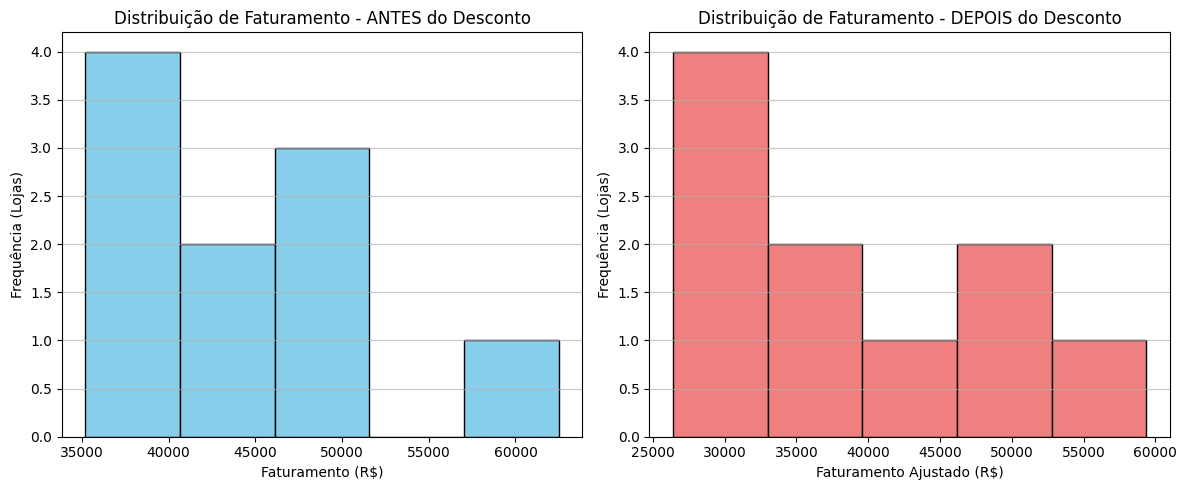

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Questão A

## Função de ESTATÍSTICA DESCRITIVA

def calcular_estatisticas(valores: list):
    """
    Calcula e retorna a média, mediana, desvio-padrão, mínimo e máximo
    de uma lista de valores.
    """
    if not valores:
        return None, None, None, None, None
        
    # Converte a lista para um array numpy para facilitar os cálculos

    arr = np.array(valores)
    media = np.mean(arr)
    mediana = np.median(arr)
    desvio_padrao = np.std(arr)
    minimo = np.min(arr)
    maximo = np.max(arr)
    
    return media, mediana, desvio_padrao, minimo, maximo

## Entrada de dados 

def processar_faturamento():
    # Lista principal que armazenará as tuplas (nome, faturamento_original)
    lojas_faturamento_original = [] 
    
    # Listas para guardar os resultados ajustados
    lojas_faturamento_ajustado = []
    
    NUM_LOJAS = 10
    
    print("--- QUESTÃO A - CADASTRO DE FATURAMENTO DAS LOJAS")
    
    # Loop para cadastrar as 10 lojas
    for i in range(NUM_LOJAS):
        while True:
            try:
                nome = input("Digite o nome da loja: ").strip()
                
                # Assume-se que o faturamento será um valor numérico
                faturamento = float(input("Digite o faturamento mensal (R$): ").replace(',', '.'))
                
                if faturamento < 0:
                    print("O faturamento não pode ser negativo. Tente novamente.")
                    continue

                print(f"Loja {i + 1} de {NUM_LOJAS}: {nome} | Faturamento: {faturamento}")

                # Adiciona a tupla à lista
                lojas_faturamento_original.append((nome, faturamento))
                break
                
            except ValueError:
                print("Entrada inválida. Digite um valor numérico para o faturamento.")
        
        desconto_percentual = 0
        
        if faturamento <= 40000.00:
            desconto_percentual = 0.25  # 25%
        elif 40000.01 <= faturamento <= 50000.00: # creio que poderia ter simplificado com apenas faturamento <= 50000.00
            desconto_percentual = 0.15  # 15%
        else: # faturamento >= 50000.01
            desconto_percentual = 0.05  # 5%
            
        valor_desconto = faturamento * desconto_percentual
        faturamento_ajustado = faturamento - valor_desconto
        
        # Armazena o resultado ajustado (nome, fat_original, fat_ajustado, desconto_aplicado)
        lojas_faturamento_ajustado.append((nome, faturamento, faturamento_ajustado, valor_desconto))
        
    return lojas_faturamento_original, lojas_faturamento_ajustado


## Questão B - Cálculos finais


def realizar_calculos_finais(lojas_ajustadas):
    total_desconto_concedido = 0.0
    lojas_abaixo_40k = []
    
    print("\n--- QUESTÃO B - RESULTADOS FINAIS")

    for nome, fat_original, fat_ajustado, valor_desconto in lojas_ajustadas:
        
        # Exibir o valor total de desconto concedido
        total_desconto_concedido += valor_desconto
        
        # Mostrar o nome das lojas com faturamento inferior a R$40.000,00 após o desconto
        if fat_ajustado < 40000.00:
            lojas_abaixo_40k.append(nome)
            
    print(f"\nVALOR TOTAL DE DESCONTO CONCEDIDO: R$ {total_desconto_concedido:,.2f}")
    
    print("\nLOJAS COM FATURAMENTO INFERIOR A R$40,000.00 (APÓS DESCONTO):")
    if lojas_abaixo_40k:
        for nome in lojas_abaixo_40k:
            print(f"- {nome}")
    else:
        print("Nenhuma loja ficou com faturamento inferior a R$40,000.00 após o desconto.")
    
    # Retorna os valores de faturamento para a etapa de estatística
    faturamento_antes = [t[1] for t in lojas_ajustadas] # fat_original
    faturamento_depois = [t[2] for t in lojas_ajustadas] # fat_ajustado
    
    return faturamento_antes, faturamento_depois

## Visualização e Estatística

def exibir_estatisticas_e_histogramas(faturamento_antes, faturamento_depois):
    
    print("\n--- QUESTÃO C")

    print("\n--- ANÁLISE ESTATÍSTICA (Antes do Desconto)")
    stats_antes = calcular_estatisticas(faturamento_antes)
    print(f"Média: R$ {stats_antes[0]:,.2f}")
    print(f"Mediana: R$ {stats_antes[1]:,.2f}")
    print(f"Desvio Padrão: R$ {stats_antes[2]:,.2f}")
    print(f"Mínimo: R$ {stats_antes[3]:,.2f}")
    print(f"Máximo: R$ {stats_antes[4]:,.2f}")

    print("\n--- ANÁLISE ESTATÍSTICA (Depois do Desconto)")
    stats_depois = calcular_estatisticas(faturamento_depois)
    print(f"Média: R$ {stats_depois[0]:,.2f}")
    print(f"Mediana: R$ {stats_depois[1]:,.2f}")
    print(f"Desvio Padrão: R$ {stats_depois[2]:,.2f}")
    print(f"Mínimo: R$ {stats_depois[3]:,.2f}")
    print(f"Máximo: R$ {stats_depois[4]:,.2f}")

    # Plotagem dos Histogramas
    plt.figure(figsize=(12, 5))

    # Histograma Antes
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1ª posição
    plt.hist(faturamento_antes, bins=5, edgecolor='black', color='skyblue')
    plt.title('Distribuição de Faturamento - ANTES do Desconto')
    plt.xlabel('Faturamento (R$)')
    plt.ylabel('Frequência (Lojas)')
    plt.grid(axis='y', alpha=0.7)

    # Histograma Depois
    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2ª posição
    plt.hist(faturamento_depois, bins=5, edgecolor='black', color='lightcoral')
    plt.title('Distribuição de Faturamento - DEPOIS do Desconto')
    plt.xlabel('Faturamento Ajustado (R$)')
    plt.ylabel('Frequência (Lojas)')
    plt.grid(axis='y', alpha=0.7)

    plt.tight_layout() # Ajusta automaticamente os subtítulos e rótulos
    plt.show()

if __name__ == "__main__":
    # 1. Entrada de Dados e Aplicação da Lógica de Desconto (a)
    lojas_originais, lojas_ajustadas = processar_faturamento()
    
    # 2. Cálculos e Exibição dos Resultados Finais (b)
    faturamento_antes, faturamento_depois = realizar_calculos_finais(lojas_ajustadas)
    
    # 3. Estatísticas e Visualização (c)
    exibir_estatisticas_e_histogramas(faturamento_antes, faturamento_depois)